In [50]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, make_scorer, f1_score,precision_score,recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [51]:
data = pd.read_csv("wine_quality.csv")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [53]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / len(arr)
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

In [55]:
def taste(quality):
  if quality <= 5:
    return 1
  elif quality > 5 and quality <= 7:
    return 2
  else:
    return 3

In [56]:
new_data = data
new_data["taste"] = data["quality"].apply(taste)

In [57]:
# separação de target e features
X = new_data.iloc[:, 0:11].values
y = new_data.iloc[:, 12].values

In [58]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 36.69%
Classe 1: 60.26%
Classe 2: 3.05%


Fold 0
Classe 0: 36.69%
Classe 1: 60.27%
Classe 2: 3.04%


Fold 1
Classe 0: 36.69%
Classe 1: 60.27%
Classe 2: 3.04%


Fold 2
Classe 0: 36.69%
Classe 1: 60.27%
Classe 2: 3.04%
Fold 3
Classe 0: 36.69%
Classe 1: 60.27%
Classe 2: 3.04%


Fold 4
Classe 0: 36.70%
Classe 1: 60.25%
Classe 2: 3.04%


Fold 5
Classe 0: 36.70%
Classe 1: 60.25%
Classe 2: 3.04%


Fold 6
Classe 0: 36.70%
Classe 1: 60.25%
Classe 2: 3.04%


Fold 7
Classe 0: 36.70%
Classe 1: 60.24%
Classe 2: 3.06%


Fold 8
Classe 0: 36.70%
Classe 1: 60.24%
Classe 2: 3.06%


Fold 9
Classe 0: 36.70%
Classe 1: 60.26%
Classe 2: 3.04%




In [59]:
kf_results = list()
kf_conf_mat = list()
kf_prec = list()
kf_f1 = list()
kf_rec = list()

scores = {
  'accuracy': make_scorer(accuracy_score),
  'precision': make_scorer(precision_score, average = 'macro'),
  'recall': make_scorer(recall_score, average = 'macro'),
  'f1_macro': make_scorer(f1_score, average = 'macro'),
  'f1_weighted': make_scorer(f1_score, average = 'weighted')
}

In [60]:
for train_ix, test_ix in kf.split(X,y):
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
  
  classifier = KNeighborsClassifier()

  parameters = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
  }
  # define search space
  search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring="accuracy", cv=3, refit=True)
  # execute search
  result = search.fit(X_train, y_train)
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
  # evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
  # evaluate the model
  acc = accuracy_score(y_test, yhat)
  conf_mat = confusion_matrix(y_test, yhat)
  precision = precision_score(y_test, yhat, average = "macro")
  f1 = f1_score(y_test, yhat, average = "weighted")
  recall = recall_score(y_test, yhat, average = "macro")
  # store the result
  #kf_class_rep.append(class_rep)
  kf_conf_mat.append(conf_mat)
  kf_results.append(acc)
  kf_prec.append(precision)
  kf_f1.append(f1)
  kf_rec.append(recall)
  # report progress
  print(">acc=%.3f,>prec=%.3f,>f1=%.3f,>rec=%.3f est=%.3f, cfg=%s" % (acc,precision,f1,recall, result.best_score_, result.best_params_))
  print(conf_mat)

>acc=0.748,>prec=0.823,>f1=0.742,>rec=0.580 est=0.584, cfg={'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
[[160  79   0]
 [ 70 321   0]
 [  0  15   5]]
>acc=0.778,>prec=0.792,>f1=0.772,>rec=0.600 est=0.582, cfg={'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
[[165  74   0]
 [ 54 336   1]
 [  1  14   5]]
>acc=0.675,>prec=0.565,>f1=0.668,>rec=0.493 est=0.581, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
[[131 107   1]
 [ 82 305   4]
 [  4  13   3]]
>acc=0.738,>prec=0.786,>f1=0.733,>rec=0.643 est=0.587, cfg={'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
[[140  98   1]
 [ 61 330   0]
 [  1   9  10]]
>acc=0.720,>prec=0.713,>f1=0.715,>rec=0.602 est=0.582, cfg={'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
[[140  98   0]
 [ 69 320   3]
 [  1  11   8]]
>acc=0.791,>prec=0.857,>f1=0.785,>rec=0.636 est=0.586, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[160  78   0]
 [ 45 347  

In [61]:
print('Accuracy: %.3f (%.3f)' % (np.mean(kf_results), np.std(kf_results)))
print('Precision: %.3f (%.3f)' % (np.mean(kf_prec), np.std(kf_prec)))
print('F1-score: %.3f (%.3f)' % (np.mean(kf_f1), np.std(kf_f1)))
print('Recall: %.3f (%.3f)' % (np.mean(kf_rec), np.std(kf_rec)))

Accuracy: 0.747 (0.034)
Precision: 0.777 (0.080)
F1-score: 0.741 (0.035)
Recall: 0.609 (0.046)


In [62]:
kf_conf_mat

[array([[160,  79,   0],
        [ 70, 321,   0],
        [  0,  15,   5]], dtype=int64),
 array([[165,  74,   0],
        [ 54, 336,   1],
        [  1,  14,   5]], dtype=int64),
 array([[131, 107,   1],
        [ 82, 305,   4],
        [  4,  13,   3]], dtype=int64),
 array([[140,  98,   1],
        [ 61, 330,   0],
        [  1,   9,  10]], dtype=int64),
 array([[140,  98,   0],
        [ 69, 320,   3],
        [  1,  11,   8]], dtype=int64),
 array([[160,  78,   0],
        [ 45, 347,   0],
        [  1,  12,   7]], dtype=int64),
 array([[148,  90,   0],
        [ 45, 346,   1],
        [  1,   9,  10]], dtype=int64),
 array([[158,  80,   0],
        [ 57, 335,   0],
        [  1,  11,   7]], dtype=int64),
 array([[132, 106,   0],
        [ 70, 322,   0],
        [  1,  10,   8]], dtype=int64),
 array([[142,  95,   1],
        [ 46, 344,   1],
        [  0,  11,   9]], dtype=int64)]

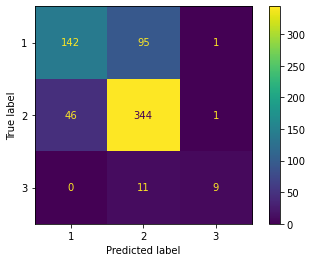

In [63]:
# matriz de confusão
plot_confusion_matrix(result, X_test, y_test)
plt.show()

In [64]:
#knn
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [65]:
print(knn.predict(X_test))

[2 1 1 1 2 2 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 2 2 2 1 2 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 1 2 1 1 1 1 2 2 2 1
 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1 1 2 1 2
 1 1 1 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 2 2 2 2
 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 1 1 1 2 1 2 2
 2 1 2 2 2 1 2 1 2 2 1 2 1 1 2 2 1 2 1 2 2 2 1 1 1 2 1 2 1 2 2 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2
 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 1 2 2
 2 2 2 2 2 1 2 2 2 2 1 2 

In [66]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.61      0.48      0.54       238
           2       0.70      0.82      0.76       391
           3       1.00      0.10      0.18        20

    accuracy                           0.67       649
   macro avg       0.77      0.47      0.49       649
weighted avg       0.68      0.67      0.66       649

